# Preço de imoveis

**Objetivo**: estimar os preços de imóveis
 * Identificar aspectos que contribuem para precificação dos imoveis
 * Entender qual aspecto é mais relevante, qual influencia mais no preço do imóvel.
 * Precificar um imóvel novo.

Base de dados simplificada e inspirada em [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

In [2]:
dados = pd.read_csv("precos_casas.csv")

# Conhecendo os dados

In [3]:
dados.head(2)

,valor,area_primeiro_andar,existe_segundo_andar,area_quintal,dist_metro,dist_parque
0,1042500,79.52,1,23.86,1.639,3.039
1,907500,117.24,0,35.17,1.538,10.910


In [4]:
dados.describe()

,valor,area_primeiro_andar,existe_segundo_andar,area_quintal,dist_metro,dist_parque
count,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,9.046060e+05,108.011548,0.432192,29.471432,2.774007,8.148135
std,3.972125e+05,35.915175,0.495550,12.227105,1.914356,4.202312
min,1.745000e+05,31.030000,0.000000,0.000000,0.103000,0.119000
25%,6.498750e+05,81.940000,0.000000,22.182500,1.419250,4.435500
50%,8.150000e+05,100.985000,0.000000,27.635000,2.263000,8.724500
75%,1.070000e+06,129.252500,1.000000,36.185000,3.886250,11.631250
max,3.775000e+06,435.900000,1.000000,170.290000,12.654000,14.998000


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   valor                 1460 non-null   int64  
 1   area_primeiro_andar   1460 non-null   float64
 2   existe_segundo_andar  1460 non-null   int64  
 3   area_quintal          1460 non-null   float64
 4   dist_metro            1460 non-null   float64
 5   dist_parque           1460 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 68.6 KB


# Correlação

In [6]:
corr = dados.corr()

In [7]:
corr["valor"]

valor                   1.000000
area_primeiro_andar     0.605852
existe_segundo_andar    0.137656
area_quintal            0.613585
dist_metro             -0.643654
dist_parque            -0.071490
Name: valor, dtype: float64

# Gráfico de dispersão(scatter)

In [8]:
px.scatter(dados, y="valor", x="dist_metro",trendline_color_override="red", trendline="ols")

# Gráfico de boxplot

In [9]:
px.box(dados, x="valor")

# Gráfico histograma

In [10]:
px.histogram(dados, x="valor")

# Gráfico Pairplot

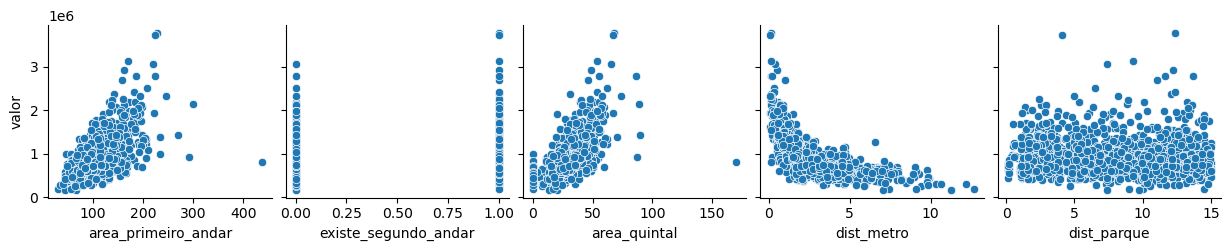

In [11]:
sns.pairplot(dados, y_vars='valor', x_vars=["area_primeiro_andar", "existe_segundo_andar", "area_quintal", "dist_metro", "dist_parque"])

# Parque é um lixo

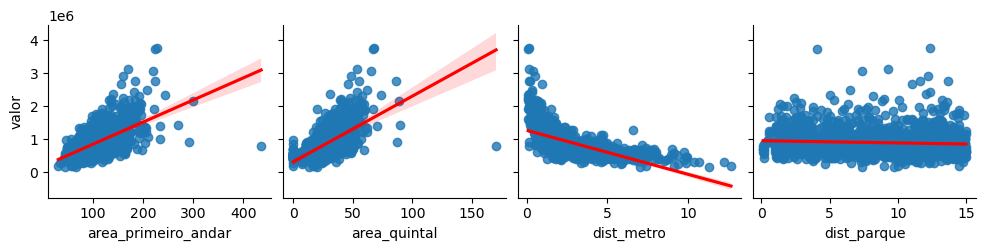

In [12]:
sns.pairplot(dados, y_vars='valor', x_vars=["area_primeiro_andar", "area_quintal", "dist_metro", "dist_parque"], kind="reg", plot_kws=({'line_kws':{'color':"red"}}))

# Aplicando a transformação logarítma

- np.log() para valores que não tem 0
- np.lo1p() para valores que tem zero ele soma

In [13]:
dados.describe().round(2)

,valor,area_primeiro_andar,existe_segundo_andar,area_quintal,dist_metro,dist_parque
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,904605.98,108.01,0.43,29.47,2.77,8.15
std,397212.51,35.92,0.50,12.23,1.91,4.20
min,174500.00,31.03,0.00,0.00,0.10,0.12
25%,649875.00,81.94,0.00,22.18,1.42,4.44
50%,815000.00,100.98,0.00,27.64,2.26,8.72
75%,1070000.00,129.25,1.00,36.18,3.89,11.63
max,3775000.00,435.90,1.00,170.29,12.65,15.00


# Observando os valores reduzidos

In [14]:
# Transformando as variáveis explicativas e resposta utilizando o logaritmo
dados['log_valor'] = np.log(dados['valor'])
dados['log_area_primeiro_andar'] = np.log(dados['area_primeiro_andar'])
dados['log_area_quintal'] = np.log1p(dados['area_quintal'])
dados['log_dist_metro'] = np.log(dados['dist_metro'])
dados['log_dist_parque'] = np.log(dados['dist_parque'])

dados.head(2)

,valor,area_primeiro_andar,existe_segundo_andar,area_quintal,dist_metro,dist_parque,log_valor,log_area_primeiro_andar,log_area_quintal,log_dist_metro,log_dist_parque
0,1042500,79.52,1,23.86,1.639,3.039,13.857132,4.376009,3.21326,0.494086,1.111529
1,907500,117.24,0,35.17,1.538,10.910,13.718449,4.764223,3.58823,0.430483,2.389680


In [15]:
dados[["valor", "log_valor"]].head(3)

,valor,log_valor
0,1042500,13.857132
1,907500,13.718449
2,1117500,13.926605


# Gráfico Pairplot do log

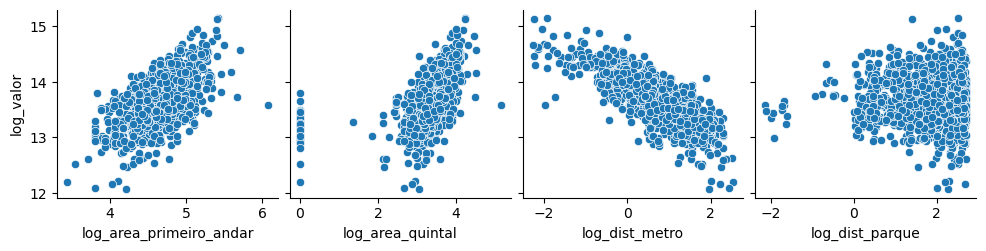

In [16]:
sns.pairplot(dados, y_vars='log_valor', x_vars=["log_area_primeiro_andar", "log_area_quintal", "log_dist_metro", "log_dist_parque"])

# Treino e Teste

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = dados[['log_area_primeiro_andar', 'existe_segundo_andar', 'log_area_quintal', 'log_dist_metro', 'log_dist_parque']]

y = dados['log_valor']

In [19]:
X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42)

# Modelo Statsmodels

In [20]:
import statsmodels.api as sm

In [21]:
X_train_com_constante = sm.add_constant(X_treino)

In [22]:
modelo_statsmodels = sm.OLS(y_treino, X_train_com_constante, hasconst=True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_valor   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     565.6
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          1.51e-290
Time:                        16:11:54   Log-Likelihood:                 182.43
No. Observations:                1022   AIC:                            -352.9
Df Residuals:                    1016   BIC:                            -323.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

* O **intercepto** é o valor esperado do preço da casa quando todas as outras variáveis são zero. Neste caso, quando todas as outras variáveis a área do primeiro andar é zero, o preço esperado da casa é de R$ 145.196,40. Nem sempre temos uma interpretação prática desse número.

* O **efeito individual** da área é 6833.97. Isso indica que para cada 1m² adicinado à área do primero andar espera-se que o preço da casa aumente em média R$6.833,97.

<img src="https://i.imgur.com/7Cm4Cot.png" width="500"/>


# Tirando o log_dist_parque

In [23]:
X_treino_novo = X_treino.drop(columns="log_dist_parque")
X_teste = X_teste.drop(columns="log_dist_parque")

# Modelo Sklearn

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, classification_report

In [25]:
modelo = LinearRegression()

In [26]:
modelo.fit(X_treino_novo, y_treino)

LinearRegression()

# Obtendo o coeficeinte de determinação (R²)

In [27]:
y_pred = modelo.predict(X_treino_novo)

In [28]:
print("R²:",r2_score(y_treino, y_pred).round(3)*100, "%")

R²: 73.6 %


# Precificando várias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [29]:
# nova casa
# Nova casa
nova_casa = pd.DataFrame({
    'log_area_primeiro_andar': [np.log(150)],
    'existe_segundo_andar': [1],
    'log_area_quintal': [np.log1p(80)],
    'log_dist_metro': [np.log(2)]
})

In [30]:
modelo.predict(nova_casa)[0]

14.007549258252599

In [31]:
print(f"R$ {np.exp(modelo.predict(nova_casa)[0]):,.2f}")

R$ 1,211,717.41


# Intercept

In [32]:
np.exp(modelo.intercept_)

84053.31231287002

# Coeficientes

In [33]:
modelo.coef_

array([ 0.47231042,  0.18126973,  0.07019339, -0.27117409])

In [34]:
np.exp(modelo_statsmodels.params.iloc[0])

84877.99321273145

# Efeito da dummy

Uma casa que tem banheiro há um aumento de 20%

In [35]:
# Efeito da dummy
print(f'Efeito da dummy: {100 * np.expm1(modelo.coef_[1].round(3)):.2f}%')

Efeito da dummy: 19.84%


# Analisando graficamente os resultados do modelo

In [36]:
y_pred = modelo.predict(X_treino_novo)

In [37]:
px.scatter(x=y_treino, y=y_pred, labels={"x":"Valores Reais", "y":"Valores Previsão"})

In [38]:
y_pred = modelo.predict(X_teste)

In [39]:
px.scatter(x=y_teste, y=y_pred, labels={"x":"Valores Reais", "y":"Valores Previsão"})

In [40]:
residuos = y_teste - y_pred

px.histogram(residuos, text_auto=True)